In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

In [2]:
jobid = 16636

out_dir = './analysis_output/job' + str(jobid)
Z, σ, mom_list, prop_mom_list = analysis.load_mu_sigma(out_dir)

<IPython.core.display.Javascript object>


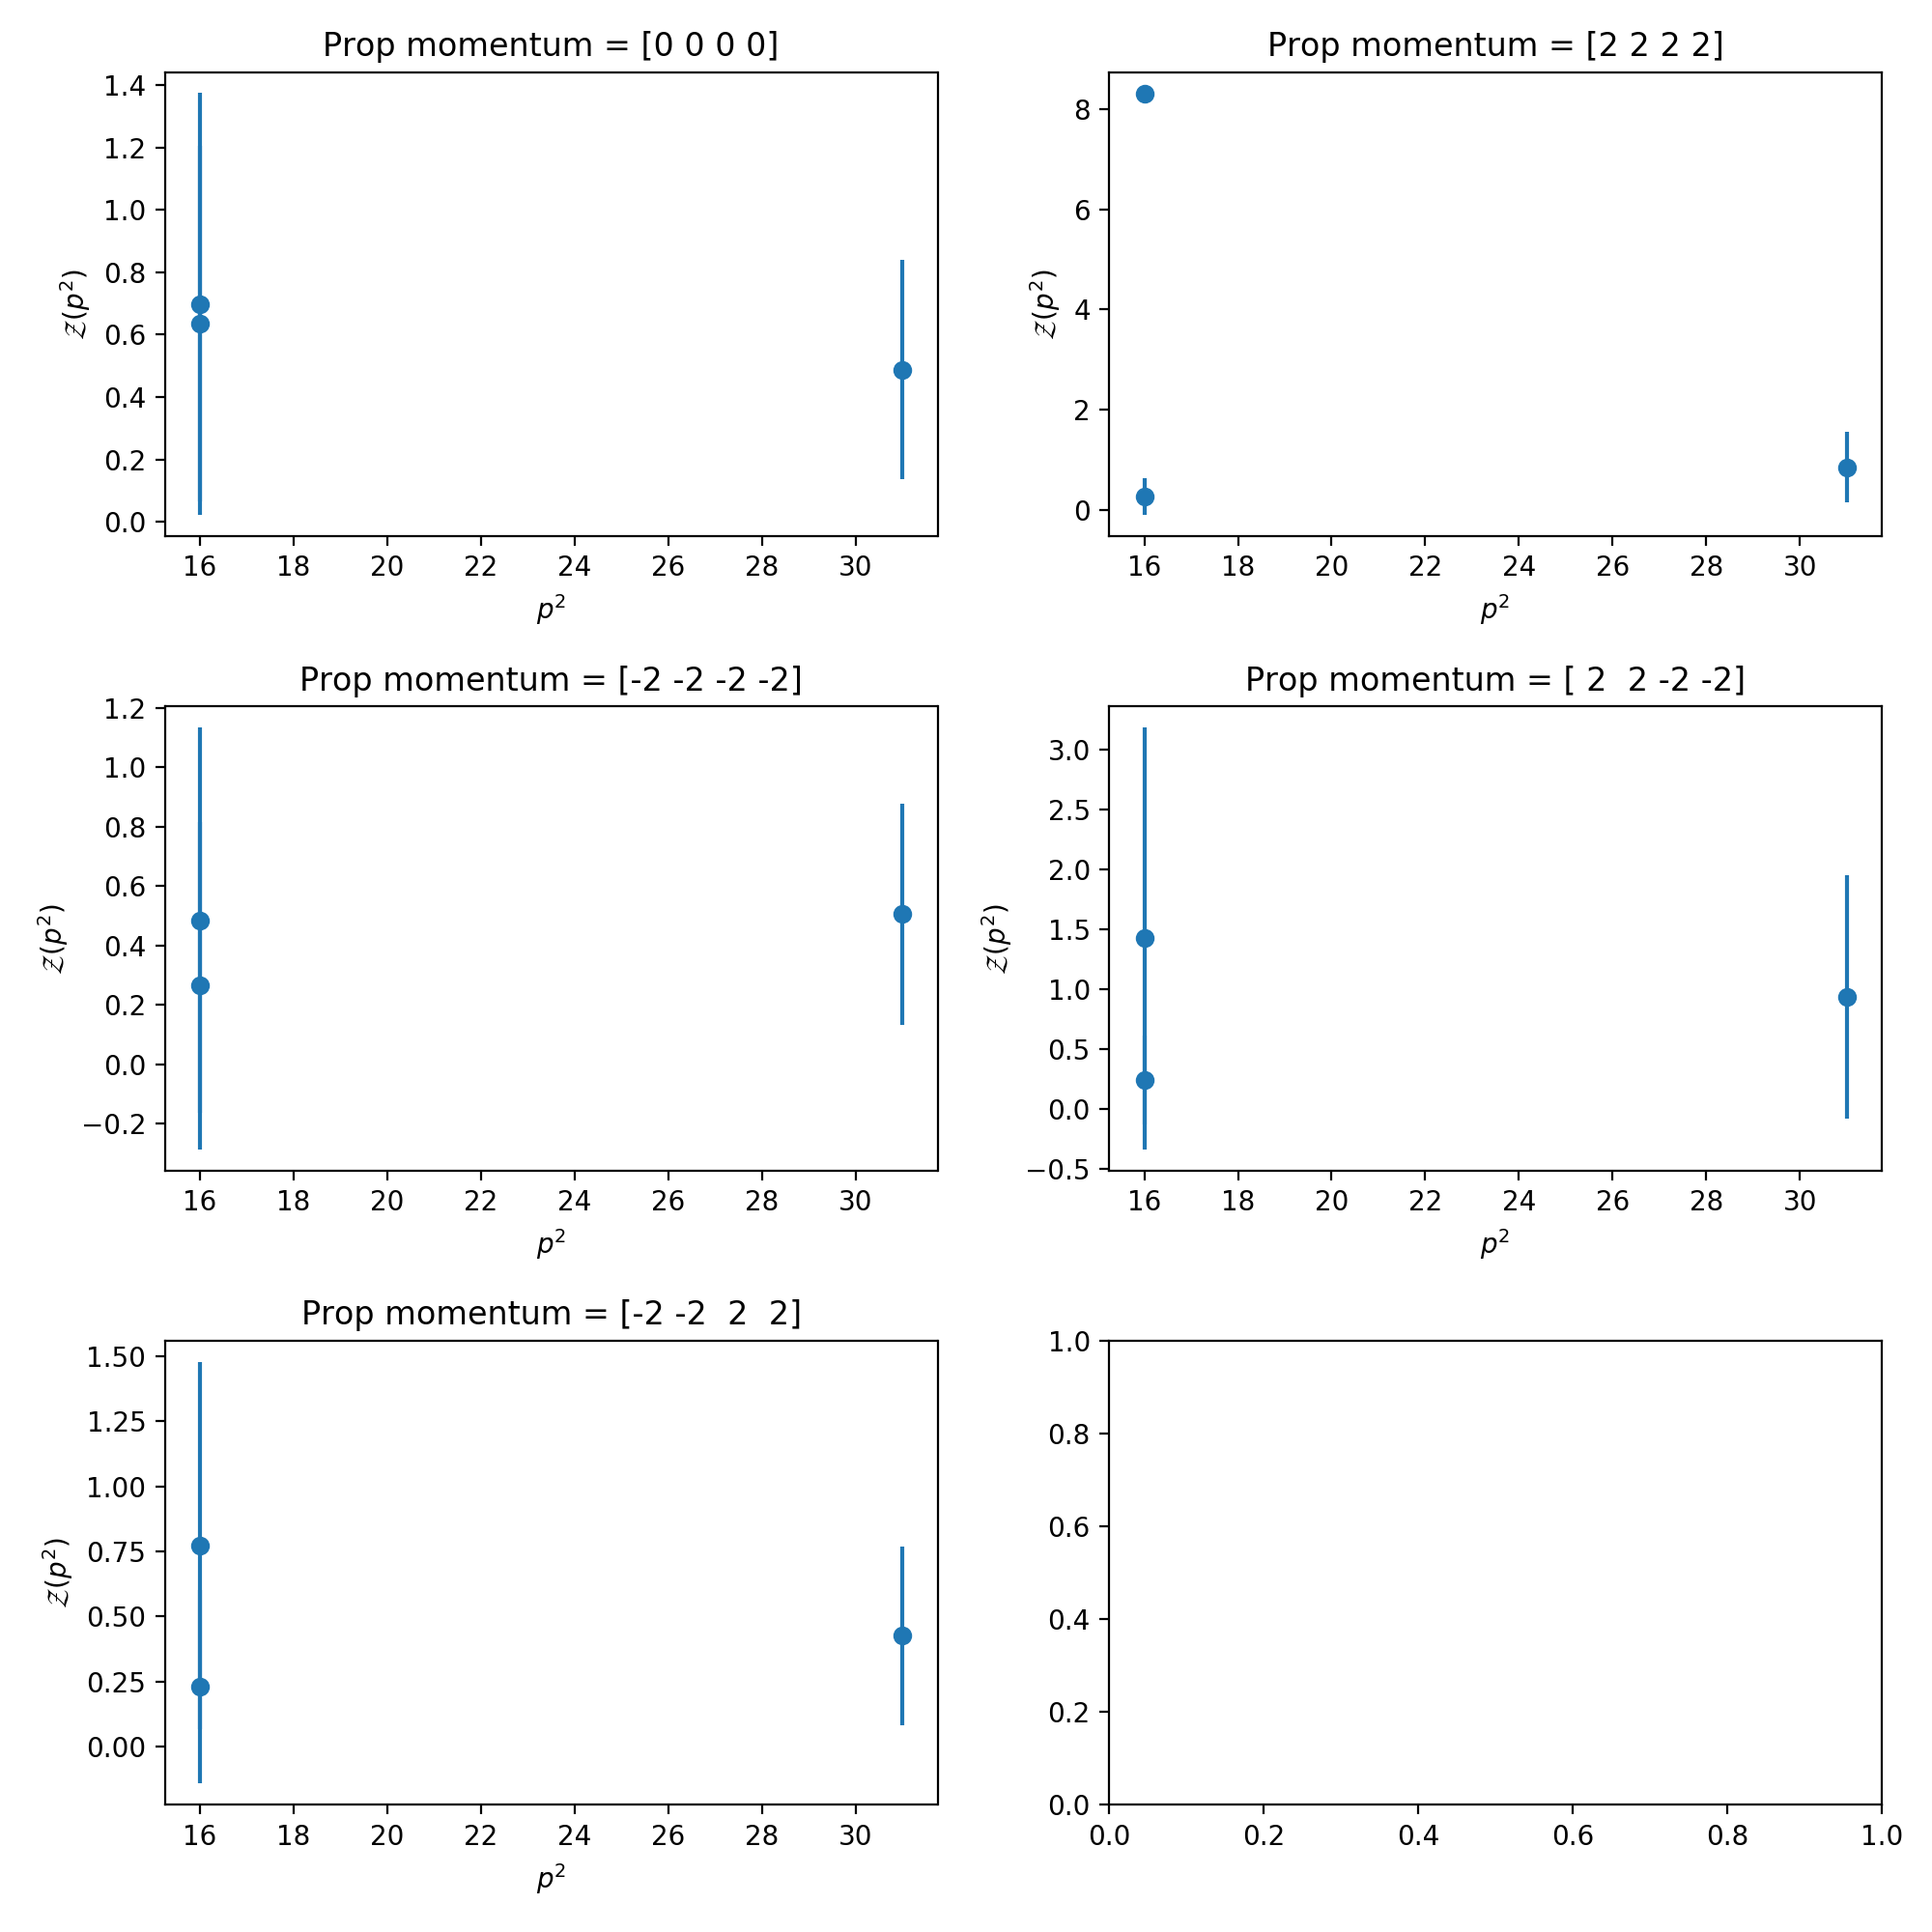

In [6]:
Z_list, σ_list = [], []
num_subplots = (len(prop_mom_list) // 2 + 1, 2)
f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
ax = ax.flatten()
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
for idx in range(len(prop_mom_list)):
    Z_list.append(np.array([Z[idx][analysis.plist_to_string(p)] for p in mom_list]))
    σ_list.append(np.array([σ[idx][analysis.plist_to_string(p)] for p in mom_list]))
    ax[idx].errorbar(p_squared, np.abs(Z_list[idx]), yerr = np.abs(σ_list[idx]), fmt = 'o')
    ax[idx].set_xlabel('$p^2$')
    ax[idx].set_ylabel('$\mathcal{Z}(p^2)$')
    ax[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
plt.tight_layout()
# plt.title('Renormalization of quark operator')
plt.show()

<IPython.core.display.Javascript object>


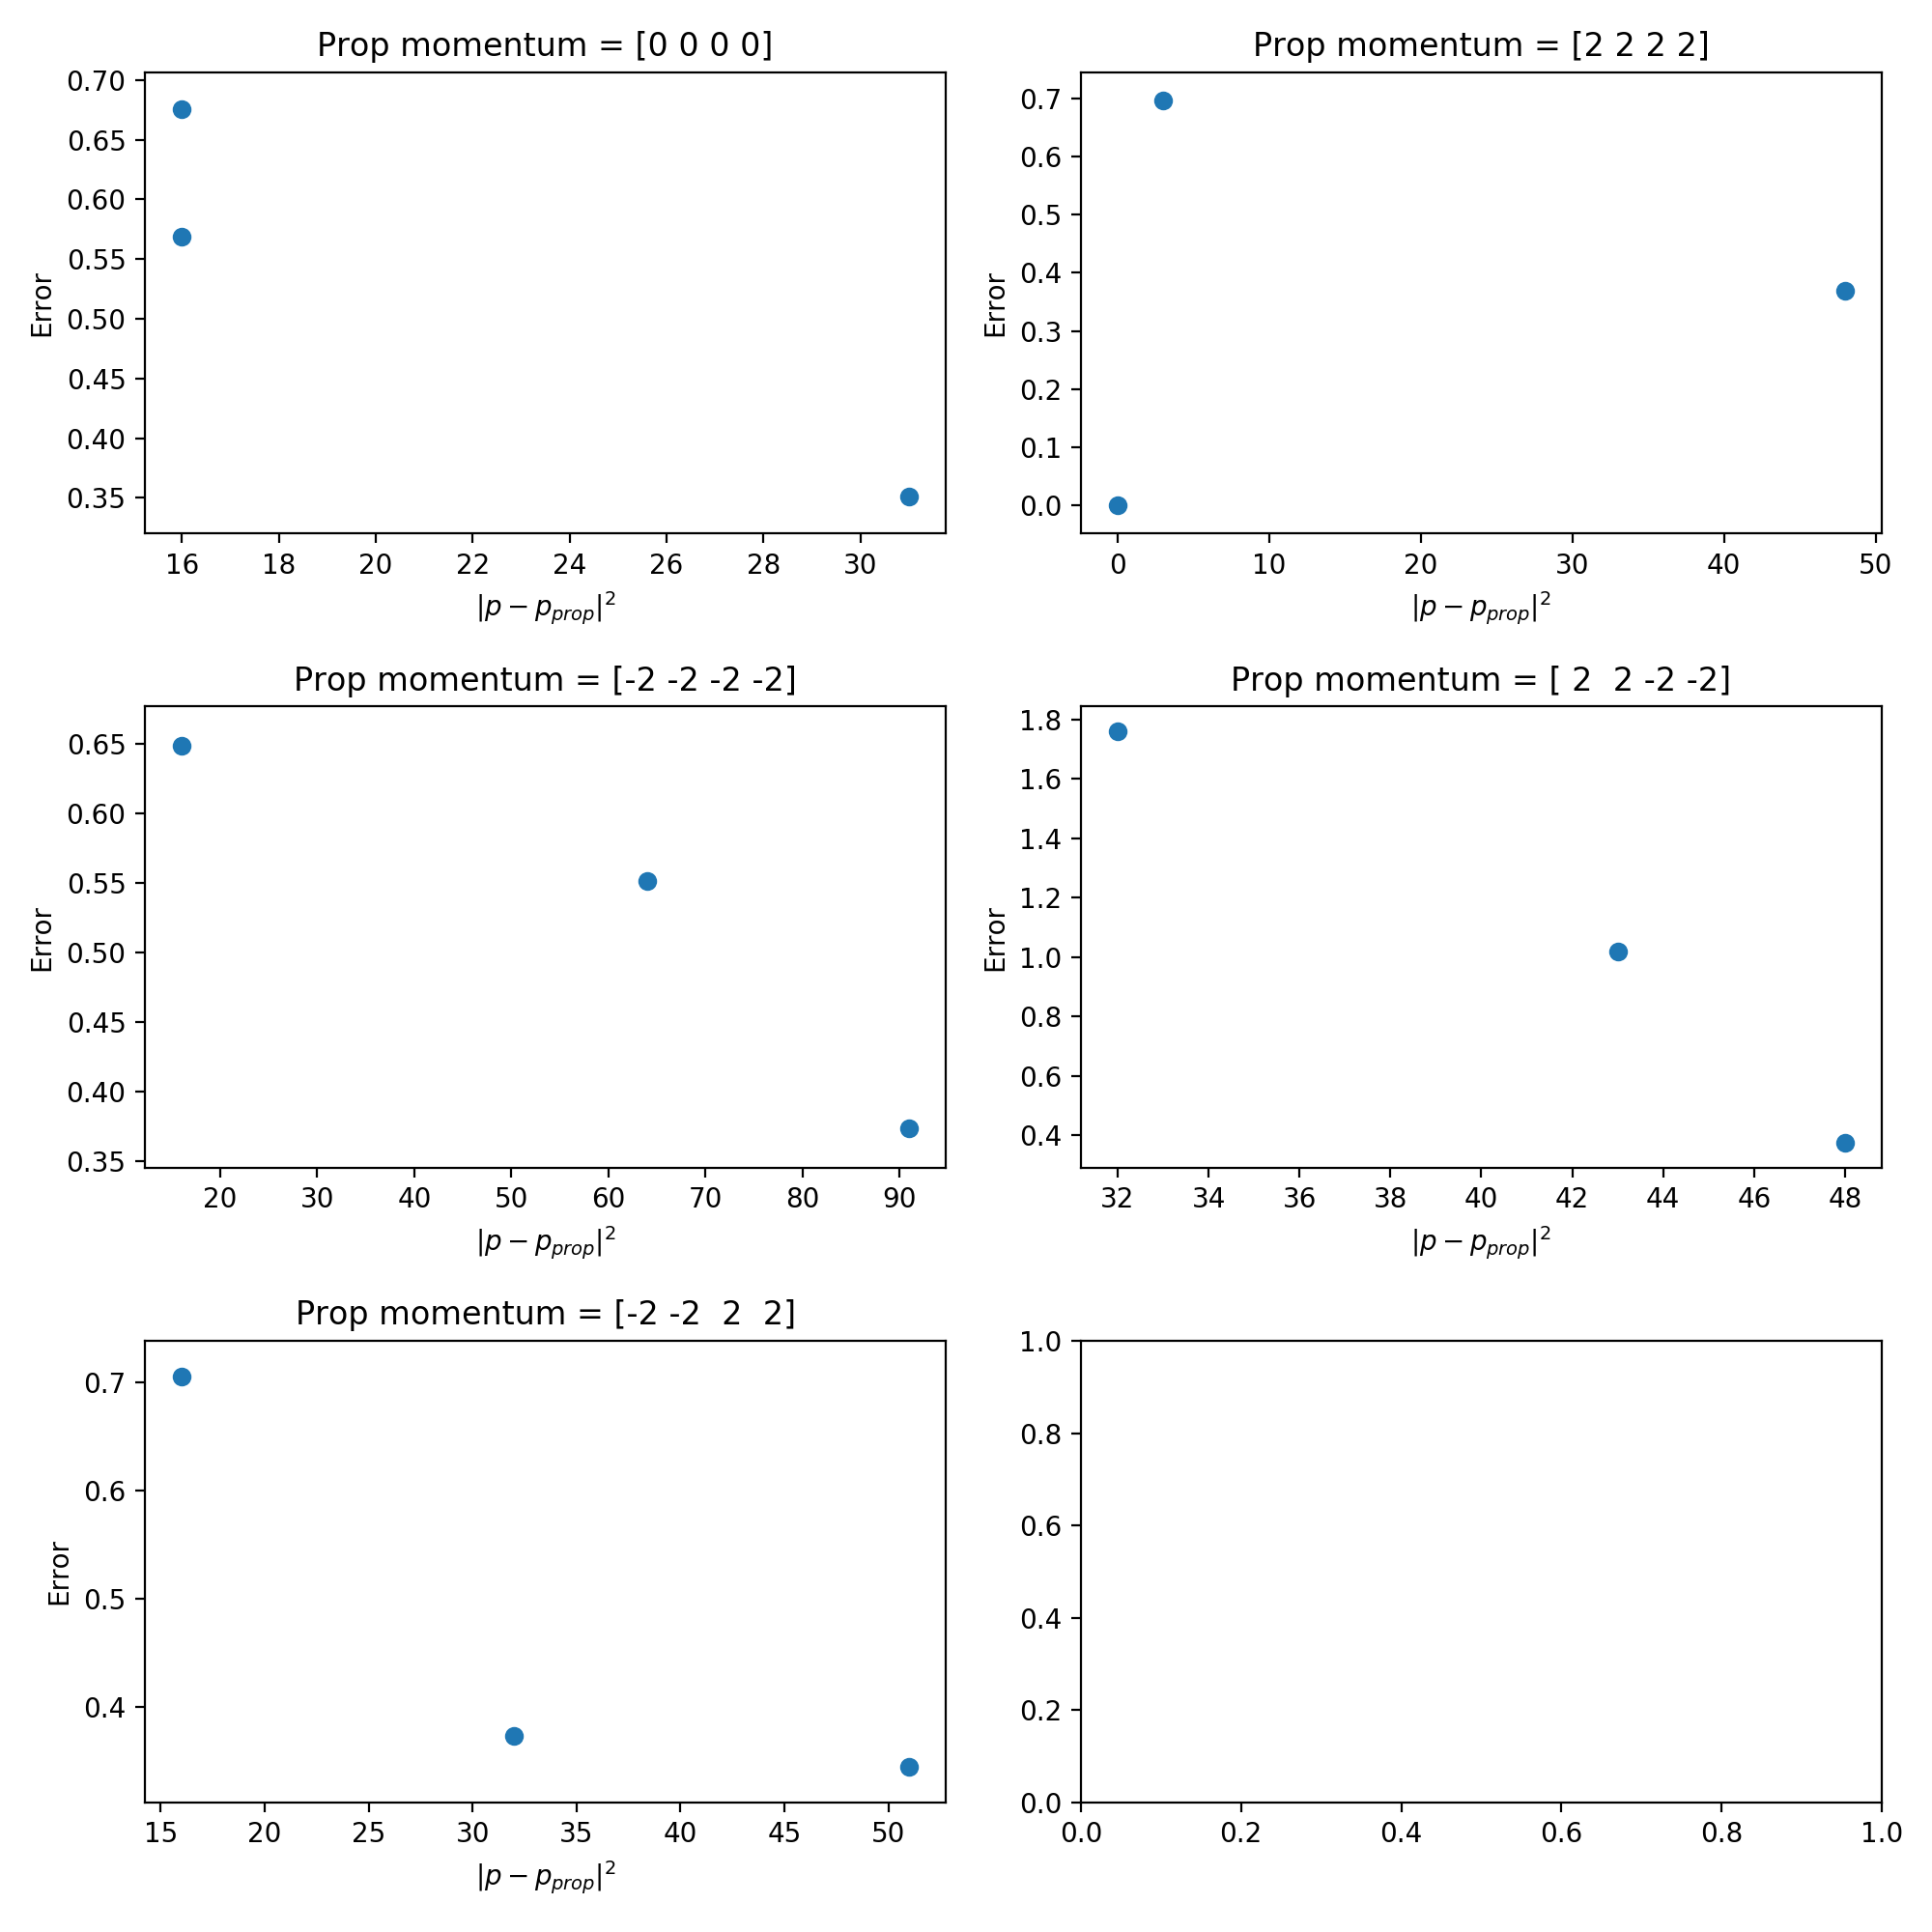

In [7]:
num_subplots = (len(prop_mom_list) // 2 + 1, 2)
f1, ax1 = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
ax1 = ax1.flatten()
for idx, mom in enumerate(prop_mom_list):
    rsquared = [analysis.square(np.array(p) - np.array(mom)) for p in mom_list]
    ax1[idx].scatter(rsquared, σ_list[idx])
    ax1[idx].set_xlabel('$|p - p_{prop}|^2$')
    ax1[idx].set_ylabel('Error')
    ax1[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
plt.tight_layout()
plt.show()